# Identifying the Risk of COVID-19 and North Atlantic Hurricanes 

**Authors**: Jocelyn Lutes, Quinton Lopez, Uriel Eckmann

## Problem Statement

## Executive Summary

## Table of Contents

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import time
# import googlemaps
import geopandas as gpd
from datetime import timedelta

pd.set_option("display.max_columns", None)

## Read-In Hurricane Data

### North Atlantic Hurricanes

In [2]:
df = pd.read_csv('../data/hurricanes_east_coast_landfall.csv')
df = df.drop(columns = ['usa_record', 'eye_diameter'])
df.head()

,storm_id,year,number,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees)
0,1851175N26270,1851,5.0,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,HU,80.0,NaN,1.0,NaN,5.0,286.0
1,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,HU,70.0,NaN,1.0,NaN,5.0,282.0
2,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,HU,65.0,NaN,1.0,NaN,5.0,284.0
3,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,TS,60.0,NaN,0.0,NaN,6.0,283.0
4,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,TS,60.0,NaN,0.0,NaN,6.0,282.0


In [3]:
geo_df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['longitude'], df['latitude']))

In [4]:
geo_df.head()

,storm_id,year,number,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees),geometry
0,1851175N26270,1851,5.0,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,HU,80.0,NaN,1.0,NaN,5.0,286.0,POINT (-96.56670 28.13330)
1,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,HU,70.0,NaN,1.0,NaN,5.0,282.0,POINT (-96.80000 28.16670)
2,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,HU,65.0,NaN,1.0,NaN,5.0,284.0,POINT (-97.07930 28.22650)
3,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,TS,60.0,NaN,0.0,NaN,6.0,283.0,POINT (-97.40000 28.30000)
4,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,TS,60.0,NaN,0.0,NaN,6.0,282.0,POINT (-97.74760 28.36170)


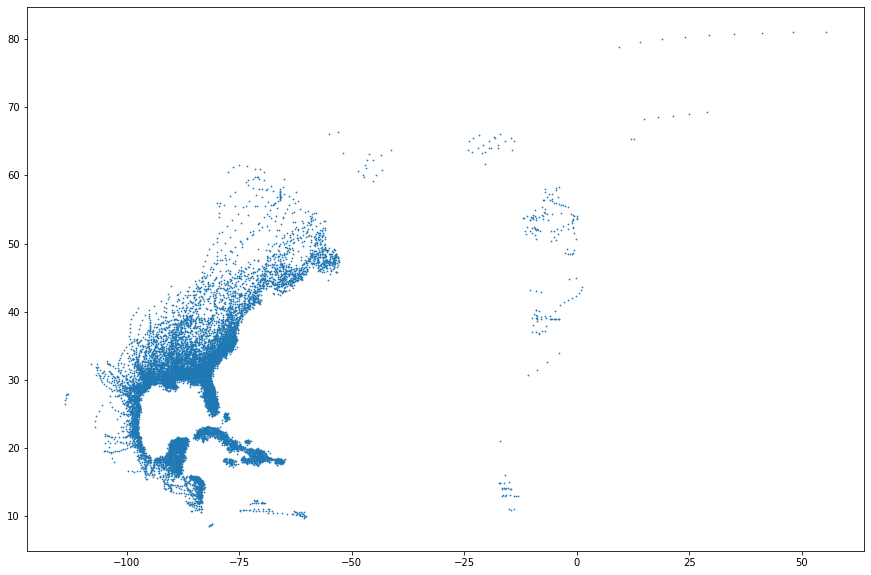

In [5]:
plt.figure(figsize= (15,10))
plt.scatter(x = df["longitude"],
           y = df["latitude"],
           s = 0.5);

### USA - States

In [6]:
usa_states = gpd.read_file('../maps/states_21basic/states.shp')
usa_states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


### USA - Counties

In [7]:
usa_counties = gpd.read_file('../maps/cb_2018_us_county_20m/cb_2018_us_county_20m.shp')
usa_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


## Identifying Hurricane Rows Within the USA

In [8]:
def usa_region_column(df1, df2, col1, new_column = None):
    # empty dictionary
    location_dict = {}
    # iterate through hurricane points
    for point_index, point in df1['geometry'].iteritems():
        # iterate through our location dataframe
        for index, location in df2['geometry'].iteritems():
            if point.within(location) == True:
                location_dict[point_index] = df2[col1][index]      
    return location_dict

### States

In [9]:
hurricane_states = usa_region_column(geo_df, usa_states, 'STATE_NAME')

In [10]:
indices_to_keep = list(hurricane_states.keys())

In [11]:
states_list = list(hurricane_states.values())

In [12]:
geo_df_usa = geo_df.loc[indices_to_keep, :]

In [13]:
geo_df_usa['state'] = states_list

In [14]:
geo_df_usa.shape

(7155, 24)

### County

In [15]:
hurricane_counties = usa_region_column(geo_df_usa, usa_counties, 'NAME')

In [16]:
indices_to_keep = list(hurricane_counties.keys())

In [17]:
county_list = list(hurricane_counties.values())

In [18]:
len(county_list)

7145

In [19]:
geo_df_usa = geo_df_usa.loc[indices_to_keep, :]

In [20]:
geo_df_usa['county'] = county_list

In [21]:
geo_df_usa.head()

,storm_id,year,number,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees),geometry,state,county
1,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,HU,70.0,NaN,1.0,NaN,5.0,282.0,POINT (-96.80000 28.16670),Texas,Calhoun
2,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,HU,65.0,NaN,1.0,NaN,5.0,284.0,POINT (-97.07930 28.22650),Texas,Refugio
3,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,TS,60.0,NaN,0.0,NaN,6.0,283.0,POINT (-97.40000 28.30000),Texas,Refugio
4,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,TS,60.0,NaN,0.0,NaN,6.0,282.0,POINT (-97.74760 28.36170),Texas,Bee
5,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 12:00:00,TS,28.4333,-98.1000,60.0,NaN,hurdat_atl,0,0.0,28.4000,-98.3000,TS,60.0,NaN,0.0,NaN,6.0,284.0,POINT (-98.10000 28.43330),Texas,Live Oak


In [54]:
geo_df_usa['usa_status'].value_counts()

TS    2457
TD    2335
EX     795
HU     780
LO     200
SD      71
SS      22
DB       4
Name: usa_status, dtype: int64

### Visualize Remaining Points

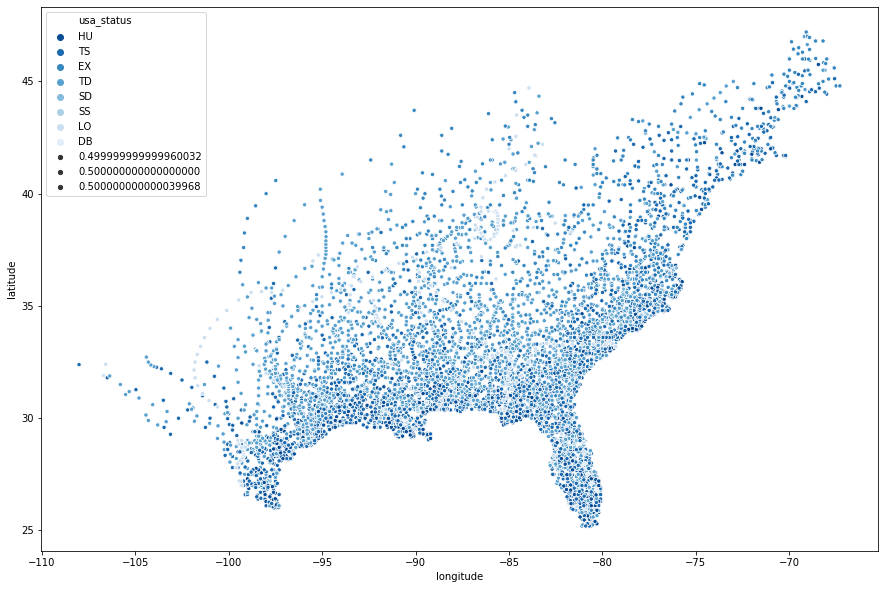

In [22]:
plt.figure(figsize= (15,10))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'usa_status', size = 0.5, data = geo_df_usa, palette = 'Blues_r');

In [23]:
geo_df_usa.to_csv('../data/geo_usa.csv')
print('File has been exported.')

File has been exported.


## Explore Hurricane Data

In [46]:
geo_df_usa.isna().sum()

storm_id                       0
year                           0
number                         0
name                           0
iso_time                       0
nature                         0
latitude                       0
longitude                      0
wmo_wind(knots)             3801
wmo_pressure(mb)            5726
wmo_agency                  3800
dist2land(km)                  0
landfall(km)                   0
usa_lat                      519
usa_lon                      519
usa_status                   481
usa_wind                     541
usa_pres                    4356
storm_category                94
sea_height(ft)              6980
storm_speed(knots)             0
storm_direction(degrees)       0
geometry                       0
state                          0
county                         0
dtype: int64

## Read-in COVID-19 Data

### Most Recent CSV from NY Times Github

In [25]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
covid_df = pd.read_csv(url)
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Get Population Data for States Affected by Hurricanes

In [26]:
alabama = pd.read_csv('USA_counties_pop/cc-est2019-agesex-01.csv')
dc = pd.read_csv('USA_counties_pop/cc-est2019-agesex-11.csv')
nebraska = pd.read_csv('USA_counties_pop/cc-est2019-agesex-31.csv')
wisconsin = pd.read_csv('USA_counties_pop/cc-est2019-agesex-55.csv')
iowa = pd.read_csv('USA_counties_pop/cc-est2019-agesex-19.csv')
rhode_island = pd.read_csv('USA_counties_pop/cc-est2019-agesex-44.csv')
vermont = pd.read_csv('USA_counties_pop/cc-est2019-agesex-50.csv')
delaware = pd.read_csv('USA_counties_pop/cc-est2019-agesex-10.csv')
connecticut = pd.read_csv('USA_counties_pop/cc-est2019-agesex-09.csv')
kansas = pd.read_csv('USA_counties_pop/cc-est2019-agesex-20.csv')
massachusetts = pd.read_csv('USA_counties_pop/cc-est2019-agesex-25.csv')
new_hampshire = pd.read_csv('USA_counties_pop/cc-est2019-agesex-33.csv')
new_jersey = pd.read_csv('USA_counties_pop/cc-est2019-agesex-34.csv')
michigan = pd.read_csv('USA_counties_pop/cc-est2019-agesex-26.csv')
west_virginia = pd.read_csv('USA_counties_pop/cc-est2019-agesex-54.csv')
maryland = pd.read_csv('USA_counties_pop/cc-est2019-agesex-24.csv')
ohio = pd.read_csv('USA_counties_pop/cc-est2019-agesex-39.csv')
illinois = pd.read_csv('USA_counties_pop/cc-est2019-agesex-17.csv')
oklahoma = pd.read_csv('USA_counties_pop/cc-est2019-agesex-40.csv')
indiana = pd.read_csv('USA_counties_pop/cc-est2019-agesex-18.csv')
missouri = pd.read_csv('USA_counties_pop/cc-est2019-agesex-29.csv')
maine = pd.read_csv('USA_counties_pop/cc-est2019-agesex-23.csv')
new_york = pd.read_csv('USA_counties_pop/cc-est2019-agesex-36.csv')
pennsylvania = pd.read_csv('USA_counties_pop/cc-est2019-agesex-42.csv')
kentucky = pd.read_csv('USA_counties_pop/cc-est2019-agesex-21.csv')
tennessee = pd.read_csv('USA_counties_pop/cc-est2019-agesex-47.csv')
arkansas = pd.read_csv('USA_counties_pop/cc-est2019-agesex-05.csv')
virginia = pd.read_csv('USA_counties_pop/cc-est2019-agesex-51.csv')
south_carolina = pd.read_csv('USA_counties_pop/cc-est2019-agesex-45.csv')
mississippi = pd.read_csv('USA_counties_pop/cc-est2019-agesex-28.csv')
north_carolina = pd.read_csv('USA_counties_pop/cc-est2019-agesex-37.csv')
louisiana = pd.read_csv('USA_counties_pop/cc-est2019-agesex-22.csv')
georgia = pd.read_csv('USA_counties_pop/cc-est2019-agesex-13.csv')
texas = pd.read_csv('USA_counties_pop/cc-est2019-agesex-48.csv')
florida = pd.read_csv('USA_counties_pop/cc-est2019-agesex-12.csv')

In [27]:
new_mexico = pd.read_csv('USA_counties_pop/cc-est2019-agesex-35.csv', encoding='ISO-8859-1')

In [28]:
county_pop = pd.concat([alabama, dc, nebraska, wisconsin, iowa, rhode_island, vermont, delaware, connecticut, kansas, massachusetts, new_hampshire, new_jersey, michigan, west_virginia, maryland, ohio, illinois, oklahoma, indiana, missouri, maine, new_york, pennsylvania, kentucky, tennessee, arkansas, virginia, south_carolina, mississippi, north_carolina, louisiana, georgia, texas, florida, new_mexico])

In [29]:
county_pop = county_pop[county_pop['YEAR'] == 12][['STNAME', 'CTYNAME', 'POPESTIMATE']]

In [30]:
county_pop.head()

,STNAME,CTYNAME,POPESTIMATE
11,Alabama,Autauga County,55869
23,Alabama,Baldwin County,223234
35,Alabama,Barbour County,24686
47,Alabama,Bibb County,22394
59,Alabama,Blount County,57826


In [31]:
county_pop['CTYNAME'] = county_pop['CTYNAME'].map(lambda x: x.split()[0])

In [32]:
covid_df = pd.merge(left = covid_df, right = county_pop, how = 'left', left_on = ['state', 'county'], right_on = ['STNAME', 'CTYNAME'])

In [33]:
covid_df = covid_df.drop(columns = ['STNAME', 'CTYNAME'])

In [34]:
covid_df = covid_df.rename(columns = {'POPESTIMATE': '2019_population'})

In [35]:
covid_df['cases_per_100000'] = round((covid_df['cases']/covid_df['2019_population']) * 100000, 1)

In [36]:
covid_df.head()

,date,county,state,fips,cases,deaths,2019_population,cases_per_100000
0,2020-01-21,Snohomish,Washington,53061.0,1,0,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,NaN,NaN
2,2020-01-23,Snohomish,Washington,53061.0,1,0,NaN,NaN
3,2020-01-24,Cook,Illinois,17031.0,1,0,5150233.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,NaN,NaN


### Data for Current Date

In [37]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_current = covid_df[covid_df['date'] == covid_df['date'].max()].copy()

In [38]:
covid_current.head()

,date,county,state,fips,cases,deaths,2019_population,cases_per_100000
412861,2020-08-08,Autauga,Alabama,1001.0,1134,22,55869.0,2029.7
412862,2020-08-08,Baldwin,Alabama,1003.0,3564,26,223234.0,1596.5
412863,2020-08-08,Barbour,Alabama,1005.0,628,5,24686.0,2544.0
412864,2020-08-08,Bibb,Alabama,1007.0,434,5,22394.0,1938.0
412865,2020-08-08,Blount,Alabama,1009.0,923,4,57826.0,1596.2


### Data for Last Two Weeks

In [39]:
covid_two_weeks_ago = covid_df[covid_df['date'] == (covid_df['date'].max() - timedelta(14))]

In [40]:
covid_two_weeks_ago = covid_two_weeks_ago.rename(columns = {'cases':'previous_cases', 'cases_per_100000': 'previous_cases_per_100000'})

In [41]:
covid_two_weeks_ago = covid_two_weeks_ago[['date', 'county', 'state', 'previous_cases', 'previous_cases_per_100000']]

### Calculate Change in Cases Over Last Two Weeks

In [43]:
covid_current = pd.merge(left = covid_current, right = covid_two_weeks_ago, how = 'left', on = ['state', 'county'])

In [44]:
covid_current.head()

,date_x,county,state,fips,cases,deaths,2019_population,cases_per_100000,date_y,previous_cases,previous_cases_per_100000
0,2020-08-08,Autauga,Alabama,1001.0,1134,22,55869.0,2029.7,2020-07-25,932.0,1668.2
1,2020-08-08,Baldwin,Alabama,1003.0,3564,26,223234.0,1596.5,2020-07-25,2662.0,1192.5
2,2020-08-08,Barbour,Alabama,1005.0,628,5,24686.0,2544.0,2020-07-25,552.0,2236.1
3,2020-08-08,Bibb,Alabama,1007.0,434,5,22394.0,1938.0,2020-07-25,318.0,1420.0
4,2020-08-08,Blount,Alabama,1009.0,923,4,57826.0,1596.2,2020-07-25,637.0,1101.6


In [49]:
covid_current['change_in_cases'] = covid_current['cases'] - covid_current['previous_cases']

In [51]:
covid_current['change_in_case_ratio'] = covid_current['cases_per_100000'] - covid_current['previous_cases_per_100000']

In [52]:
covid_current.head()

,date_x,county,state,fips,cases,deaths,2019_population,cases_per_100000,date_y,previous_cases,previous_cases_per_100000,change_in_cases,change_in_case_ratio
0,2020-08-08,Autauga,Alabama,1001.0,1134,22,55869.0,2029.7,2020-07-25,932.0,1668.2,202.0,361.5
1,2020-08-08,Baldwin,Alabama,1003.0,3564,26,223234.0,1596.5,2020-07-25,2662.0,1192.5,902.0,404.0
2,2020-08-08,Barbour,Alabama,1005.0,628,5,24686.0,2544.0,2020-07-25,552.0,2236.1,76.0,307.9
3,2020-08-08,Bibb,Alabama,1007.0,434,5,22394.0,1938.0,2020-07-25,318.0,1420.0,116.0,518.0
4,2020-08-08,Blount,Alabama,1009.0,923,4,57826.0,1596.2,2020-07-25,637.0,1101.6,286.0,494.6


In [53]:
covid_current[covid_current['change_in_cases'] == 0]

,date_x,county,state,fips,cases,deaths,2019_population,cases_per_100000,date_y,previous_cases,previous_cases_per_100000,change_in_cases,change_in_case_ratio
75,2020-08-08,Haines Borough,Alaska,2100.0,8,0,NaN,NaN,2020-07-25,8.0,NaN,0.0,NaN
81,2020-08-08,Lake and Peninsula Borough,Alaska,2164.0,5,0,NaN,NaN,2020-07-25,5.0,NaN,0.0,NaN
86,2020-08-08,Petersburg Borough,Alaska,2195.0,9,0,NaN,NaN,2020-07-25,9.0,NaN,0.0,NaN
186,2020-08-08,Alpine,California,6003.0,2,0,NaN,NaN,2020-07-25,2.0,NaN,0.0,NaN
247,2020-08-08,Baca,Colorado,8009.0,14,0,NaN,NaN,2020-07-25,14.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,2020-08-08,Braxton,West Virginia,54007.0,8,0,13957.0,57.3,2020-07-25,8.0,57.3,0.0,0.0
3133,2020-08-08,Ritchie,West Virginia,54085.0,3,0,9554.0,31.4,2020-07-25,3.0,31.4,0.0,0.0
3143,2020-08-08,Wirt,West Virginia,54105.0,6,0,5821.0,103.1,2020-07-25,6.0,103.1,0.0,0.0
3235,2020-08-08,Niobrara,Wyoming,56027.0,2,0,NaN,NaN,2020-07-25,2.0,NaN,0.0,NaN
